In [39]:
import matplotlib.pyplot as plt
import numpy as np

from ISLP import load_data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
College = load_data('College')
College.head(20)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [3]:
College['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [4]:
# Encode Private as 1 (Yes) or 0 (No)
ohe = OneHotEncoder()
r = ohe.fit_transform(College[['Private']])
College['Private'] = r.toarray()
College['Private'] = (College['Private'] == 0).astype('int')
College.head(20)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,1,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,1,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,1,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,1,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,1,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [5]:
# Separate X (predictors) and y (response)
X = College.drop('Apps', axis=1)
y = College['Apps']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=5
)

In [53]:
# Fit linear regression model to train, and evaluate in test
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test) # R^2 score

0.9080991554210204

In [54]:
# Linear regression using cross_val_score
cross_val_score(reg, X, y, cv=10).mean()

0.9031534047459558

In [55]:
# The coefficients from Linear Regression
lreg_coefs = reg.coef_

In [64]:
def find_best_alpha(model, alphas):
    scores = []
    #alphas = np.arange(0, 100, 0.5)
    for a in alphas:
        clf = model(alpha=a) # model can be Ridge, Lasso, etc
        scores.append(cross_val_score(clf, X, y, cv=10).mean())

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(alphas, scores)
    ax.set_xscale('log')
    ax.grid()

    # coefs for the best alpha
    best_alpha = alphas[int(scores.index(max(scores)))]
    best_clf = model(alpha=best_alpha).fit(X_train, y_train)
    return best_clf.coef_, best_alpha

array([-4.05304047e+02,  1.16923170e+00,  2.83623165e-01,  6.00891047e+01,
       -2.28716379e+01,  2.01476359e-02,  4.18501412e-02, -2.65183389e-02,
        2.13510597e-01, -1.01806073e-02, -2.82398581e-03, -4.08845590e+00,
       -5.98203634e+00,  7.88873232e+00, -8.74512284e+00,  4.28320845e-02,
        7.27180477e+00])

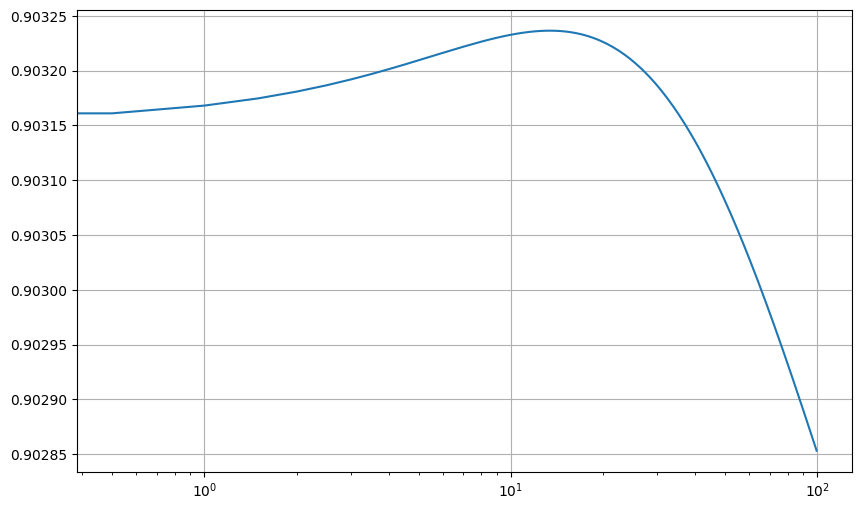

In [65]:
ridge_coefs, _ = find_best_alpha(Ridge, np.arange(0, 100, 0.5))
ridge_coefs

(array([-4.67608102e+02,  1.16834343e+00,  2.83453330e-01,  5.99149279e+01,
        -2.27233183e+01,  1.86292946e-02,  4.09849597e-02, -2.41134524e-02,
         2.16602639e-01, -6.45153988e-03, -2.37699038e-03, -4.30407336e+00,
        -6.16385589e+00,  6.24554169e+00, -8.39698574e+00,  4.22626218e-02,
         7.29608476e+00]),
 6.909999999999999)

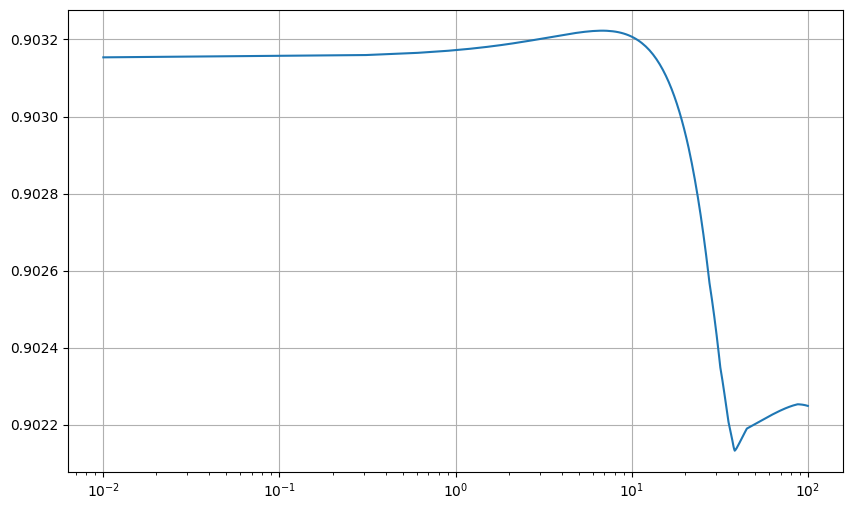

In [66]:
lasso_coefs, best_alpha_lasso = find_best_alpha(Lasso, np.arange(0.01, 100, 0.3))
lasso_coefs, best_alpha_lasso

In [67]:
for a, b, c in zip(lreg_coefs, ridge_coefs, lasso_coefs):
    print(a,b,c)

-554.8356821682193 -405.30404675757 -467.6081016759489
1.1659464107487756 1.1692317033124184 1.1683434332892024
0.28698140133180045 0.2836231649478624 0.28345332987815947
60.18176291019639 60.08910468076148 59.91492785273067
-22.87034080736185 -22.87163793535693 -22.72331828045865
0.016038040208727077 0.020147635911702745 0.018629294560894637
0.04013954060255626 0.04185014123250761 0.04098495969797305
-0.020099325650287683 -0.026518338934267503 -0.02411345238686652
0.22118224725328728 0.21351059692967828 0.2166026392999146
-0.002206904077841183 -0.010180607259840947 -0.006451539875266717
-0.001086400290539153 -0.0028239858089780137 -0.0023769903750191414
-4.729869259021578 -4.088455902168913 -4.304073361190134
-6.447849489111112 -5.9820363420869445 -6.163855890138309
6.0558754024651735 7.88873232142825 6.245541690481358
-8.015323872656507 -8.745122836474835 -8.396985739191349
0.041898528347719476 0.04283208452753137 0.04226262183260834
7.418017844962408 7.271804771055558 7.296084762754